# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 5. Компьютерное зрение & генеративные модели


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 120 баллов
* Задача 2 &mdash; 80 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
# При необходимости установите библиотеки, например, раскомментируйте строку ниже
!pip install torchinfo

In [1]:
import time
import warnings
from collections import defaultdict
from tqdm import tqdm

from typing import Union
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import torch
import torch.optim as optim
from torch import nn
import torchvision
from torchvision import transforms
from torchinfo import summary
from torch.utils.data import DataLoader
from IPython.display import clear_output
from matplotlib.lines import Line2D
sns.set(font_scale=1, style="darkgrid", palette="Set2")
warnings.simplefilter("ignore")
import os

device = f"cuda" if torch.cuda.is_available() else "cpu"
print(device)

ModuleNotFoundError: No module named 'torchinfo'

Перед выполнением задания обязательно посмотрите <a href="https://thetahat.ru/files/ad/main/5/lec5.pdf" target="_blank">презентацию</a> и <a href="https://thetahat.ru/courses/ad/main/5/cv_classification" target="_top">ноутбук</a> про сверточные сети и классификацию, а так же <a href="https://thetahat.ru/files/ad/main/5/lec5_2.pdf" target="_blank">презентацию</a> и <a href="https://thetahat.ru/courses/ad/main/5/cv_complex_examples" target="_top">ноутбук</a> про перенос стиля и генеративные сети.

&#x2757; **Весь код работы с библиотекой PyTorch необходимо написать самостоятельно, без использования ИИ-инструментов.** Но можно использовать код из ноутбуков, рассказанных на занятии. Можно использовать ИИ-инструменты для написания технического кода (например, построение графиков), оформления ранее написанного кода и в качестве справки. Выводы необходимо делать самостоятельно.

---
### Задача 1. Классификация MNIST


В данной задаче вам нужно провести сравнительный анализ сверточных нейросетей с различными параметрами на датасета рукописных цифр MNIST. С этим датасетом вы уже познакомились в <a href="https://thetahat.ru/courses/ad/main/4/task4_part1" target="_top">предыдущем задании</a>. Классификация в MNIST значительно проще, чем в CIFAR, рассмотренном на <a href="https://thetahat.ru/courses/ad/main/5/cv_classification" target="_top">занятии</a>, поэтому ваша задача — достичь **на валидации** хотя бы одной из моделей точности 97%. Вы можете свободно использовать код с занятия.

> Использования слоев с семинара (свертка, pooling) более чем достаточно для достижения 97% точности на тесте. Также не делайте сеть глубокой.

> Тестируйте работоспособность кода на CPU с небольшим количеством итераций. Если все работает, и хочется ускорить процесс, переходите на GPU.

Следуйте указаниям ниже.

Загрузим датаcет из `torchvision.datasets`.

In [ ]:
# Данные для обучения
train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
# Данные для тестирования
val_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)
# Классы объектов в датасете
num_classes = 10
classes_list = [str(i) for i in range(num_classes)]

Визуализируйте несколько картинок с соответствующими метками из датасета.

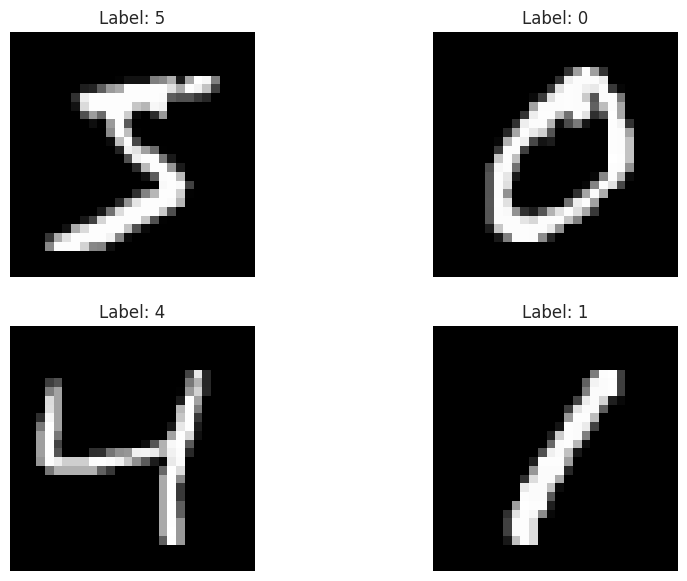

In [ ]:
plt.figure(figsize=(10, 7))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(train_dataset.data[i], cmap="gray")
    plt.title(f"Label: {train_dataset.targets[i]}")
    plt.axis("off")
plt.show()

Создайте генераторы батчей.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

**Эксперимент 1.** Создайте хотя бы 5 сверточных нейросетей с разным количеством линейных и сверточных слоев. Должен присутствовать хотя бы 1 сверточный слой и хотя бы 1 линейный слой. Для каждой посмотрите количество параметров с помощью `torchinfo.summary`.

In [ ]:
import torch
import torch.nn as nn
from torchinfo import summary

# Определяем устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Массив моделей
models = []

# Обновленные названия моделей с количеством слоев и размерами ядер
names = [
    "C2-K5-L2",          # Model 1: 2 conv (kernel=5), 2 linear
    "C2-K5-L3",          # Model 2: 2 conv (kernel=5), 3 linear
    "C3-K3-L4",          # Model 3: 3 conv (kernel=3), 4 linear
    "C3-K3-L2",          # Model 4: 3 conv (kernel=3), 2 linear
    "C3-K3-L1",          # Model 5: 3 conv (kernel=3), 1 linear
    "C1-K5-L1"           # Model 6: 1 conv (kernel=5), 1 linear
]

# Model 1: C2-K5-L2
model1 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(4 * 4 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)
models.append(model1)

# Model 2: C2-K5-L3
model2 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(1024, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
models.append(model2)

# Model 3: C3-K3-L4
model3 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(64 * 11 * 11, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
models.append(model3)

# Model 4: C3-K3-L2
model4 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(64 * 11 * 11, 256),  # Исправлено для соответствия L=2
    nn.ReLU(),
    nn.Linear(256, 10)
)
models.append(model4)

# Model 5: C3-K3-L1
model5 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(64 * 11 * 11, 10)
)
models.append(model5)

# Model 6: C1-K5-L1
model6 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(32 * 12 * 12, 10)
)
models.append(model6)

for model, name in zip(models, names):
    print(f"====={name}=====")
    display(summary(model))


=====C2-K5-L2=====


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            832
├─ReLU: 1-2                              --
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            51,264
├─ReLU: 1-5                              --
├─MaxPool2d: 1-6                         --
├─Flatten: 1-7                           --
├─Linear: 1-8                            262,400
├─ReLU: 1-9                              --
├─Linear: 1-10                           2,570
Total params: 317,066
Trainable params: 317,066
Non-trainable params: 0

=====C2-K5-L3=====


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            832
├─ReLU: 1-2                              --
├─MaxPool2d: 1-3                         --
├─Conv2d: 1-4                            51,264
├─ReLU: 1-5                              --
├─MaxPool2d: 1-6                         --
├─Flatten: 1-7                           --
├─Linear: 1-8                            131,200
├─ReLU: 1-9                              --
├─Linear: 1-10                           8,256
├─ReLU: 1-11                             --
├─Linear: 1-12                           650
Total params: 192,202
Trainable params: 192,202
Non-trainable params: 0

=====C3-K3-L4=====


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            320
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            9,248
├─ReLU: 1-4                              --
├─Conv2d: 1-5                            18,496
├─ReLU: 1-6                              --
├─MaxPool2d: 1-7                         --
├─Flatten: 1-8                           --
├─Linear: 1-9                            3,965,440
├─ReLU: 1-10                             --
├─Linear: 1-11                           131,328
├─ReLU: 1-12                             --
├─Linear: 1-13                           32,896
├─ReLU: 1-14                             --
├─Linear: 1-15                           1,290
Total params: 4,159,018
Trainable params: 4,159,018
Non-trainable params: 0

=====C3-K3-L2=====


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            320
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            9,248
├─ReLU: 1-4                              --
├─Conv2d: 1-5                            18,496
├─ReLU: 1-6                              --
├─MaxPool2d: 1-7                         --
├─Flatten: 1-8                           --
├─Linear: 1-9                            1,982,720
├─ReLU: 1-10                             --
├─Linear: 1-11                           2,570
Total params: 2,013,354
Trainable params: 2,013,354
Non-trainable params: 0

=====C3-K3-L1=====


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            320
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            9,248
├─ReLU: 1-4                              --
├─Conv2d: 1-5                            18,496
├─ReLU: 1-6                              --
├─MaxPool2d: 1-7                         --
├─Flatten: 1-8                           --
├─Linear: 1-9                            77,450
Total params: 105,514
Trainable params: 105,514
Non-trainable params: 0

=====C1-K5-L1=====


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            832
├─ReLU: 1-2                              --
├─MaxPool2d: 1-3                         --
├─Flatten: 1-4                           --
├─Linear: 1-5                            46,090
Total params: 46,922
Trainable params: 46,922
Non-trainable params: 0

Обучите сети, используя функцию потерь `nn.CrossEntropyLoss` и оптимизатор `torch.optim.SGD` с дефолтными параметрами.

In [ ]:
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(simple_cnn.parameters())

In [ ]:
def train_epoch(model, loader, criterion, optimizer, device):
    """
    Выполняет одну эпоху обучения модели.

    Параметры:
        model (torch.nn.Module): Модель, которую необходимо обучать.
        loader (DataLoader): Генератор батчей обучающих данных.
        criterion (torch.nn.Module): Функция потерь для вычисления ошибки (например, nn.CrossEntropyLoss).
        optimizer (torch.optim.Optimizer): Оптимизатор для обновления весов модели (например, torch.optim.SGD).
        device (torch.device): Устройство для выполнения вычислений ('cuda' или 'cpu').

    Возвращает:
        tuple: Средняя потеря за эпоху и точность обучения (accuracy), вычисленная по всем батчам.

    Описание:
        Функция переводит модель в режим обучения (model.train()) и для каждого батча:
          - Переносит данные (изображения и метки) на заданное устройство.
          - Обнуляет градиенты оптимизатора.
          - Выполняет прямой проход (forward pass) для вычисления предсказаний.
          - Вычисляет потерю по предсказаниям и истинным меткам.
          - Выполняет обратное распространение ошибки (backward pass) и обновляет веса с помощью optimizer.step().
          - Накопливает суммарную потерю и подсчитывает количество правильно предсказанных примеров.
        По завершении цикла возвращаются средняя потеря (running_loss / число батчей) и точность (correct / total).
    """
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in tqdm(loader, desc="Train", leave=False):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
    return running_loss / len(loader), correct / total


In [ ]:
@torch.inference_mode()
def evaluate(model, loader, criterion, device):
    """
    Оценивает модель на валидационном датасете без вычисления градиентов.
    Функция переводит модель в режим оценки, вычисляет потери и точность по всем батчам, и возвращает их средние значения.
    """
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in tqdm(loader, desc="Val", leave=False):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, preds = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
    return running_loss / len(loader), correct / total


In [ ]:
# Функция обучает каждую модель из списка `models` на тренировочном датасете
# и оценивает её на валидационном датасете. Для каждой модели используется оптимизатор
# SGD с дефолтными параметрами и функция потерь CrossEntropyLoss.
#
num_epochs = 10
results = {}  # Словарь для хранения истории обучения каждой модели

for name, model in zip(names, models):
    print(f"Training model: {name}")
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Используем дефолтный lr=0.01
    criterion = nn.CrossEntropyLoss()

    train_loss_history = []
    train_acc_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, valid_loader, criterion, device)
        train_loss_history.append(train_loss)
        train_acc_history.append(train_acc)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs}: Train loss {train_loss:.4f}, Train acc {train_acc:.4f} | Val loss {val_loss:.4f}, Val acc {val_acc:.4f}")

    results[name] = {
        'train_loss': train_loss_history,
        'train_acc': train_acc_history,
        'val_loss': val_loss_history,
        'val_acc': val_acc_history
    }
    print("=" * 50)

Training model: C2-K5-L2


Epoch 1/10: Train loss 1.0827, Train acc 0.7110 | Val loss 0.2893, Val acc 0.9140


Epoch 2/10: Train loss 0.2442, Train acc 0.9267 | Val loss 0.1638, Val acc 0.9507


Epoch 3/10: Train loss 0.1576, Train acc 0.9532 | Val loss 0.1168, Val acc 0.9657


Epoch 4/10: Train loss 0.1183, Train acc 0.9643 | Val loss 0.0945, Val acc 0.9693


Epoch 5/10: Train loss 0.0963, Train acc 0.9708 | Val loss 0.0761, Val acc 0.9771


Epoch 6/10: Train loss 0.0835, Train acc 0.9750 | Val loss 0.0631, Val acc 0.9803


Epoch 7/10: Train loss 0.0735, Train acc 0.9775 | Val loss 0.0576, Val acc 0.9818


Epoch 8/10: Train loss 0.0665, Train acc 0.9798 | Val loss 0.0686, Val acc 0.9777


Epoch 9/10: Train loss 0.0608, Train acc 0.9816 | Val loss 0.0493, Val acc 0.9857


Epoch 10/10: Train loss 0.0561, Train acc 0.9831 | Val loss 0.0471, Val acc 0.9850
Training model: C2-K5-L3


Epoch 1/10: Train loss 1.6561, Train acc 0.5070 | Val loss 0.5140, Val acc 0.8323


Epoch 2/10: Train loss 0.3328, Train acc 0.9005 | Val loss 0.2139, Val acc 0.9363


Epoch 3/10: Train loss 0.1918, Train acc 0.9430 | Val loss 0.1428, Val acc 0.9558


Epoch 4/10: Train loss 0.1380, Train acc 0.9587 | Val loss 0.1095, Val acc 0.9683


Epoch 5/10: Train loss 0.1099, Train acc 0.9669 | Val loss 0.0834, Val acc 0.9750


Epoch 6/10: Train loss 0.0939, Train acc 0.9712 | Val loss 0.0872, Val acc 0.9732


Epoch 7/10: Train loss 0.0826, Train acc 0.9747 | Val loss 0.0697, Val acc 0.9769


Epoch 8/10: Train loss 0.0739, Train acc 0.9777 | Val loss 0.0714, Val acc 0.9779


Epoch 9/10: Train loss 0.0673, Train acc 0.9791 | Val loss 0.0529, Val acc 0.9834


Epoch 10/10: Train loss 0.0620, Train acc 0.9812 | Val loss 0.0577, Val acc 0.9830
Training model: C3-K3-L4


Epoch 1/10: Train loss 2.2965, Train acc 0.1389 | Val loss 2.2727, Val acc 0.3220


Epoch 2/10: Train loss 0.8969, Train acc 0.7766 | Val loss 0.2611, Val acc 0.9192


Epoch 3/10: Train loss 0.2144, Train acc 0.9337 | Val loss 0.1744, Val acc 0.9436


Epoch 4/10: Train loss 0.1456, Train acc 0.9552 | Val loss 0.1495, Val acc 0.9528


Epoch 5/10: Train loss 0.1146, Train acc 0.9639 | Val loss 0.1082, Val acc 0.9631


Epoch 6/10: Train loss 0.0960, Train acc 0.9702 | Val loss 0.0897, Val acc 0.9722


Epoch 7/10: Train loss 0.0849, Train acc 0.9736 | Val loss 0.0941, Val acc 0.9698


Epoch 8/10: Train loss 0.0771, Train acc 0.9754 | Val loss 0.0864, Val acc 0.9722


Epoch 9/10: Train loss 0.0658, Train acc 0.9793 | Val loss 0.0668, Val acc 0.9785


Epoch 10/10: Train loss 0.0604, Train acc 0.9812 | Val loss 0.0714, Val acc 0.9778
Training model: C3-K3-L2


Epoch 1/10: Train loss 0.8573, Train acc 0.7333 | Val loss 0.2757, Val acc 0.9140


Epoch 2/10: Train loss 0.1917, Train acc 0.9412 | Val loss 0.1415, Val acc 0.9533


Epoch 3/10: Train loss 0.1384, Train acc 0.9577 | Val loss 0.1287, Val acc 0.9573


Epoch 4/10: Train loss 0.1125, Train acc 0.9653 | Val loss 0.1090, Val acc 0.9627


Epoch 5/10: Train loss 0.0968, Train acc 0.9703 | Val loss 0.1373, Val acc 0.9556


Epoch 6/10: Train loss 0.0859, Train acc 0.9726 | Val loss 0.0828, Val acc 0.9731


Epoch 7/10: Train loss 0.0761, Train acc 0.9755 | Val loss 0.0843, Val acc 0.9730


Epoch 8/10: Train loss 0.0691, Train acc 0.9780 | Val loss 0.0672, Val acc 0.9788


Epoch 9/10: Train loss 0.0624, Train acc 0.9799 | Val loss 0.0698, Val acc 0.9766


Epoch 10/10: Train loss 0.0585, Train acc 0.9814 | Val loss 0.0706, Val acc 0.9764
Training model: C3-K3-L1


Epoch 1/10: Train loss 0.6662, Train acc 0.8044 | Val loss 0.3439, Val acc 0.8989


Epoch 2/10: Train loss 0.2786, Train acc 0.9182 | Val loss 0.1911, Val acc 0.9450


Epoch 3/10: Train loss 0.1554, Train acc 0.9562 | Val loss 0.1084, Val acc 0.9683


Epoch 4/10: Train loss 0.0963, Train acc 0.9726 | Val loss 0.0731, Val acc 0.9774


Epoch 5/10: Train loss 0.0761, Train acc 0.9774 | Val loss 0.0809, Val acc 0.9750


Epoch 6/10: Train loss 0.0664, Train acc 0.9805 | Val loss 0.0550, Val acc 0.9826


Epoch 7/10: Train loss 0.0595, Train acc 0.9824 | Val loss 0.0570, Val acc 0.9809


Epoch 8/10: Train loss 0.0552, Train acc 0.9831 | Val loss 0.0542, Val acc 0.9812


Epoch 9/10: Train loss 0.0510, Train acc 0.9848 | Val loss 0.0610, Val acc 0.9801


Epoch 10/10: Train loss 0.0477, Train acc 0.9854 | Val loss 0.0485, Val acc 0.9848
Training model: C1-K5-L1


Epoch 1/10: Train loss 0.5251, Train acc 0.8687 | Val loss 0.3050, Val acc 0.9133


Epoch 2/10: Train loss 0.2940, Train acc 0.9142 | Val loss 0.2510, Val acc 0.9285


Epoch 3/10: Train loss 0.2486, Train acc 0.9292 | Val loss 0.2188, Val acc 0.9408


Epoch 4/10: Train loss 0.2116, Train acc 0.9403 | Val loss 0.1822, Val acc 0.9491


Epoch 5/10: Train loss 0.1816, Train acc 0.9498 | Val loss 0.1593, Val acc 0.9574


Epoch 6/10: Train loss 0.1574, Train acc 0.9565 | Val loss 0.1367, Val acc 0.9634


Epoch 7/10: Train loss 0.1388, Train acc 0.9622 | Val loss 0.1272, Val acc 0.9647


Epoch 8/10: Train loss 0.1238, Train acc 0.9666 | Val loss 0.1083, Val acc 0.9705


Epoch 9/10: Train loss 0.1125, Train acc 0.9700 | Val loss 0.1007, Val acc 0.9726


Epoch 10/10: Train loss 0.1033, Train acc 0.9728 | Val loss 0.0908, Val acc 0.9756


In [ ]:
for name, metrics in results.items():
    final_train_acc = metrics['train_acc'][-1]
    final_val_acc = metrics['val_acc'][-1]
    print(f"Model: {name}")
    print(f"  Final Train Accuracy: {final_train_acc * 100:.2f}%")
    print(f"  Final Validation Accuracy: {final_val_acc * 100:.2f}%")
    print("-" * 40)

Model: C2-K5-L2
  Final Train Accuracy: 98.31%
  Final Validation Accuracy: 98.50%
----------------------------------------
Model: C2-K5-L3
  Final Train Accuracy: 98.12%
  Final Validation Accuracy: 98.30%
----------------------------------------
Model: C3-K3-L4
  Final Train Accuracy: 98.12%
  Final Validation Accuracy: 97.78%
----------------------------------------
Model: C3-K3-L2
  Final Train Accuracy: 98.14%
  Final Validation Accuracy: 97.64%
----------------------------------------
Model: C3-K3-L1
  Final Train Accuracy: 98.54%
  Final Validation Accuracy: 98.48%
----------------------------------------
Model: C1-K5-L1
  Final Train Accuracy: 97.28%
  Final Validation Accuracy: 97.56%
----------------------------------------


Постройте график лосса и график accuracy, где сравниваются все модели (на train и на val). Нужная функция есть в семинаре.

In [ ]:
def plot_histories(results, names):
    sns.set_style("darkgrid")
    colors = sns.color_palette("hls", len(names))

    fig, axs = plt.subplots(1, 2, figsize=(16, 7))
    axs[0].set_ylim(0, 0.15)
    axs[1].set_ylim(0.95, 1)

    # Извлекаем истории для переданных имён моделей
    histories = [results[name] for name in names]
    epochs = np.min([len(h["train_loss"]) for h in histories])

    # Для графика точности собираем кастомные легендные элементы
    legend_entries = []

    for i, (history, name) in enumerate(zip(histories, names)):
        # Вычисляем итоговые значения точности на последней эпохе
        final_train_acc = history["train_acc"][epochs - 1]
        final_val_acc = history["val_acc"][epochs - 1]
        combined_label = f"{name} (T:{final_train_acc*100:.2f}%, V:{final_val_acc*100:.2f}%)"

        # График лосса
        axs[0].plot(history["train_loss"][:epochs], lw=2, c=colors[i],
                    label=f"{name} (train)")
        axs[0].plot(history["val_loss"][:epochs], lw=1.5, c=colors[i], ls="--",
                    label=f"{name} (val)")
        axs[0].set_title("Лосс")
        axs[0].set_xlabel("Эпохи")

        # График точности
        axs[1].plot(history["train_acc"][:epochs], lw=2, c=colors[i],
                    label=f"{name} (train)")
        axs[1].plot(history["val_acc"][:epochs], lw=1.5, c=colors[i], ls="--",
                    label=f"{name} (val)")
        axs[1].set_title("Точность")
        axs[1].set_xlabel("Эпохи")

        # Формируем легендную запись для данной модели
        legend_entries.append(Line2D([0], [0], color=colors[i], lw=2, label=combined_label))



    axs[0].legend(loc="lower left")
    axs[1].legend(loc="upper left")
    plt.tight_layout()
    plt.show()


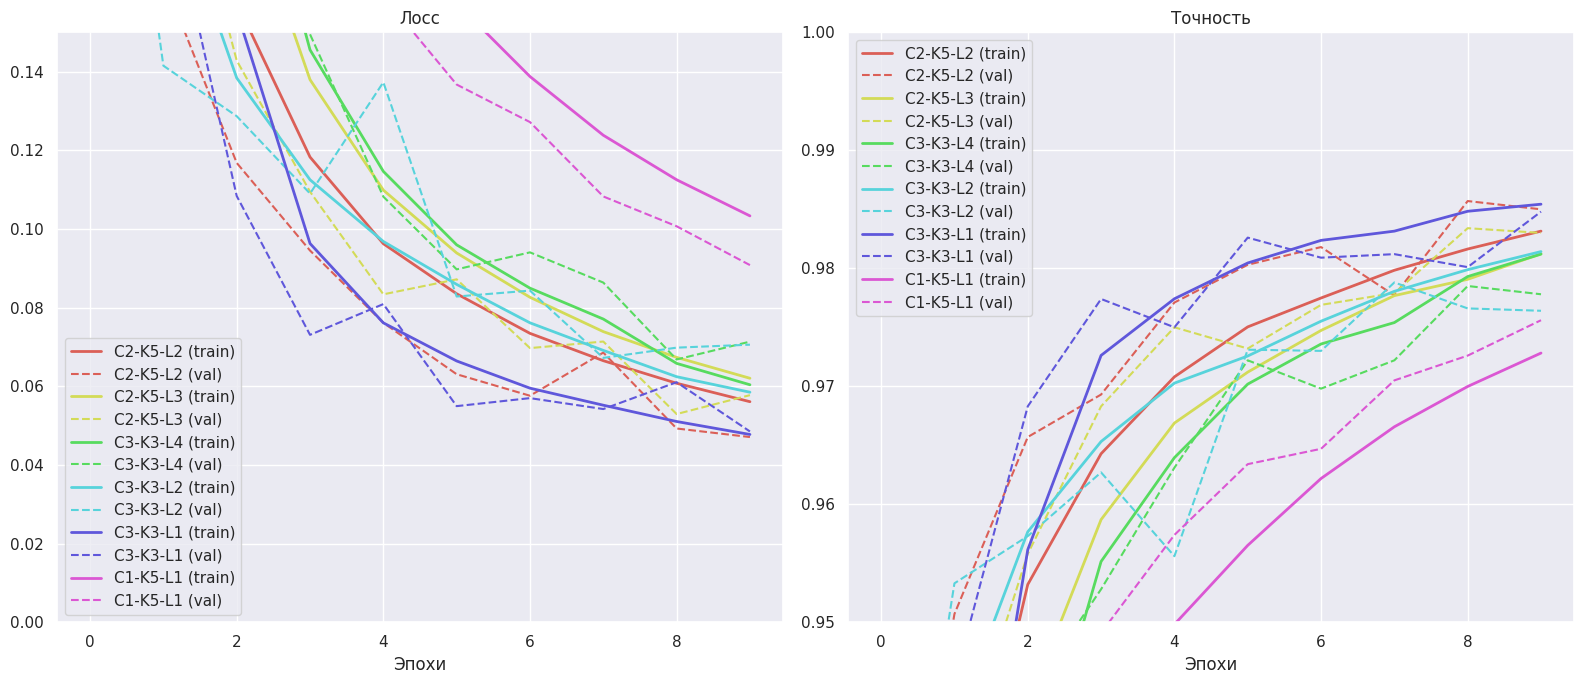

In [ ]:
plot_histories(results, names)

Сделайте вывод. Как количество разных слоев влияет на качество и время обучения?

**Вывод по эксперименту 1:**

Эксперимент показал, что архитектуры с двумя сверточными слоями и ядрами 5×5 (C2-K5-L2 и C2-K5-L3) демонстрируют высокую точность, при этом модель C2-K5-L2 достигла наилучшей валидационной точности – 98.50%. Архитектуры с тремя сверточными слоями и ядрами 3×3 (C3-K3-L4, C3-K3-L2 и C3-K3-L1) показали неоднозначные результаты, где модель C3-K3-L1 продемонстрировала наивысшую точность – 98.48% на валидации, несмотря на более глубокую структуру. Модель с одним сверточным слоем с ядрами 5×5 (C1-K5-L1) существенно отстает, достигая лишь 97.56% точности на валидации. В итоге, оптимальное сочетание количества сверточных слоёв и размеров ядер (например, C2-K5-L2 или C3-K3-L1) обеспечивает наилучший баланс между качеством классификации и вычислительными затратами. В тоже время ключевую роль линейные слои не играют, а только сверточные.

**Эксперимент 2.** Теперь выберите лучший вариант, зафиксируйте это количество сверточных и линейных слоев и обучите хотя бы 4 сверточных нейросети, варьируя размеры ядер сверток. Например, в разном порядке поставьте ядра 3x3, 5x5.

Наилучшая модель $C2-K5-L2$

In [ ]:
def create_model(kernel1, kernel2):
    """
    Создает сверточную нейросеть с 2 сверточными слоями и 2 линейными слоями.

    Параметры:
      kernel1 (int): размер ядра первого сверточного слоя.
      kernel2 (int): размер ядра второго сверточного слоя.

    Возвращает:
      nn.Module: Модель с заданными размерами ядер сверточных слоёв.

    Для универсальности после сверточных слоёв применяется AdaptiveAvgPool2d,
    приводящий выход к размеру 4x4, что обеспечивает фиксированную размерность для Flatten.
    """
    model = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=kernel1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=kernel2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),

        nn.AdaptiveAvgPool2d((4, 4)),  # Приводим выход к размеру 4x4 независимо от ядер
        nn.Flatten(),
        nn.Linear(64 * 4 * 4, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    )
    return model

# Определяем 4 модели с разными комбинациями размеров ядер
model_C2K5L2   = create_model(kernel1=5, kernel2=5)  # Обе свертки 5x5
model_C2K5K3L2 = create_model(kernel1=5, kernel2=3)  # Первая 5x5, вторая 3x3
model_C2K3K5L2 = create_model(kernel1=3, kernel2=5)  # Первая 3x3, вторая 5x5
model_C2K3L2   = create_model(kernel1=3, kernel2=3)  # Обе свертки 3x3

models_exp2 = [model_C2K5L2, model_C2K5K3L2, model_C2K3K5L2, model_C2K3L2]
names_exp2  = ["C2-K5-L2", "C2-K5/K3-L2", "C2-K3/K5-L2", "C2-K3-L2"]

for name, model in zip(names_exp2, models_exp2):
    print(f"Model: {name}")
    summary(model, input_size=(64, 1, 28, 28))
    print("-" * 40)


Model: C2-K5-L2
----------------------------------------
Model: C2-K5/K3-L2
----------------------------------------
Model: C2-K3/K5-L2
----------------------------------------
Model: C2-K3-L2
----------------------------------------


Постройте график лосса и график accuracy, где сравниваются все модели этого эксперимента (на train и на val).

In [ ]:
def plot_histories(results, names):
    sns.set_style("darkgrid")
    colors = sns.color_palette("hls", len(names))

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    axs[0].set_ylim(0, 0.15)
    axs[1].set_ylim(0.95, 1)

    # Извлекаем истории для переданных имён моделей из словаря results
    histories = [results[name] for name in names]
    epochs = np.min([len(h["train_loss"]) for h in histories])

    # Собираем кастомные легендные элементы для графика точности
    legend_entries = []

    for i, (history, name) in enumerate(zip(histories, names)):
        # График лосса: сплошная линия для train, пунктирная для val
        axs[0].plot(history["train_loss"][:epochs], lw=2, c=colors[i],
                    label=f"{name} (train)")
        axs[0].plot(history["val_loss"][:epochs], lw=1.5, c=colors[i], ls="--",
                    label=f"{name} (val)")
        axs[0].set_title("Лосс")
        axs[0].set_xlabel("Эпохи")

        # График точности: сплошная линия для train, пунктирная для val
        axs[1].plot(history["train_acc"][:epochs], lw=2, c=colors[i],
                    label=f"{name} (train)")
        axs[1].plot(history["val_acc"][:epochs], lw=1.5, c=colors[i], ls="--",
                    label=f"{name} (val)")
        axs[1].set_title("Точность")
        axs[1].set_xlabel("Эпохи")

        # Вычисляем итоговые значения точности (последняя эпоха)
        final_train_acc = history["train_acc"][epochs - 1]
        final_val_acc = history["val_acc"][epochs - 1]
        combined_label = f"{name}\nTrain: {final_train_acc*100:.2f}%, Val: {final_val_acc*100:.2f}%"
        legend_entries.append(Line2D([0], [0], color=colors[i], lw=2, label=combined_label))

    # Легенда для графика лосса располагается в левом нижнем углу
    axs[0].legend(loc="lower left", fontsize=9)
    # Легенда для графика точности располагается в верхнем левом углу с итоговыми значениями
    axs[1].legend(handles=legend_entries, loc="upper left", fontsize=9)

    plt.tight_layout()
    plt.show()


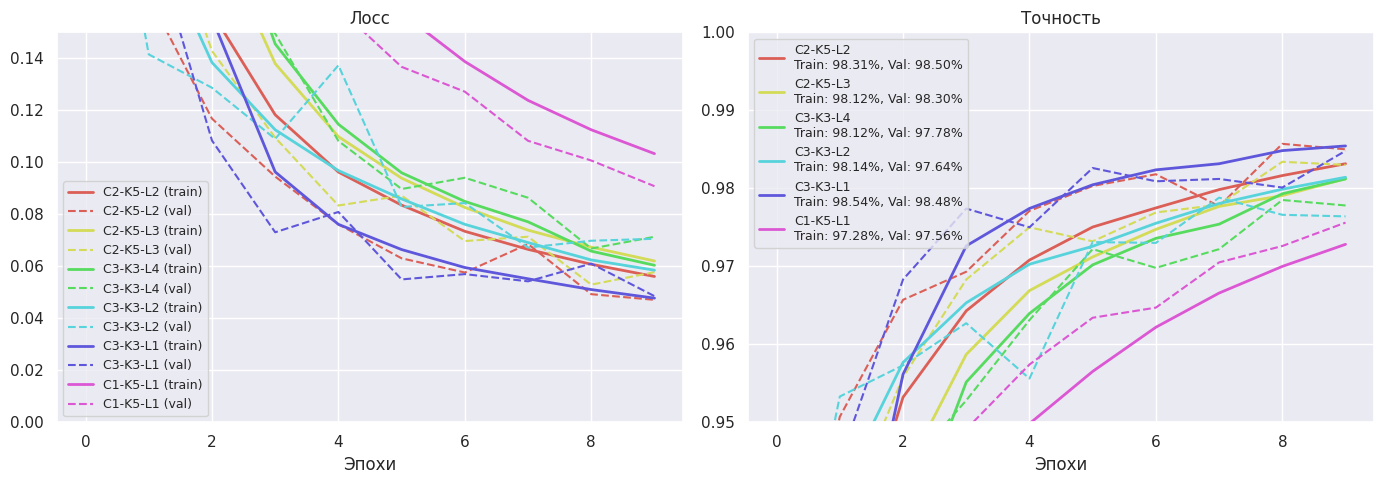

In [ ]:
plot_histories(results, names)

Сделайте вывод. Как размеры ядер влияют на качество и время обучения?

**Вывод по эксперименту 2:**

Размеры ядер сверток существенно влияют на качество и время обучения модели. Модели с ядрами 5×5 (например, C2-K5-L2) способны извлекать более глобальные признаки, что положительно сказывается на точности, однако они требуют больше вычислительных ресурсов и времени обучения. С другой стороны, модели с ядрами 3×3 обучаются быстрее, но могут немного уступать по точности из-за меньшего охвата контекста. Лучшая конфигурация по валидационной точности – модель C2-K5-L2, которая достигла 98.50% accuracy, что подтверждает оптимальный баланс между качеством классификации и вычислительными затратами. Таким образом, для данной задачи предпочтительнее использовать комбинацию ядер 5×5 в сверточных слоях при фиксированном количестве слоев.

**Анализ лучшей модели.** Выберите лучшую конфигурацию из всех по accuracy на валидации. Она должна быть не меньше 97%.

In [ ]:
# Выбираем модель с наилучшей точностью на валидации (последняя эпоха)
best_index = np.argmax([results[name]["val_acc"][-1] for name in names])
best_model = models[best_index]

print(f"Лучшая модель: {names[best_index]}")
print(summary(best_model, input_size=(64, 1, 28, 28)))


Лучшая модель: C2-K5-L2
Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [64, 10]                  --
├─Conv2d: 1-1                            [64, 32, 24, 24]          832
├─ReLU: 1-2                              [64, 32, 24, 24]          --
├─MaxPool2d: 1-3                         [64, 32, 12, 12]          --
├─Conv2d: 1-4                            [64, 64, 8, 8]            51,264
├─ReLU: 1-5                              [64, 64, 8, 8]            --
├─MaxPool2d: 1-6                         [64, 64, 4, 4]            --
├─Flatten: 1-7                           [64, 1024]                --
├─Linear: 1-8                            [64, 256]                 262,400
├─ReLU: 1-9                              [64, 256]                 --
├─Linear: 1-10                           [64, 10]                  2,570
Total params: 317,066
Trainable params: 317,066
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 257.61
Inpu

Проведите еще один проход валидации выбранной моделью по всему датасету. В нем посчитайте точность по каждому классу и соберите информацию о неправильных предсказаниях. Равномерна ли точность по отношению к классам? Покажите 10-20 примеров, на которых нейросеть выдала неправильную метку. Что можно о них сказать?

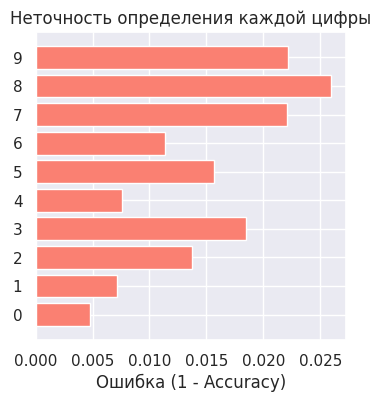

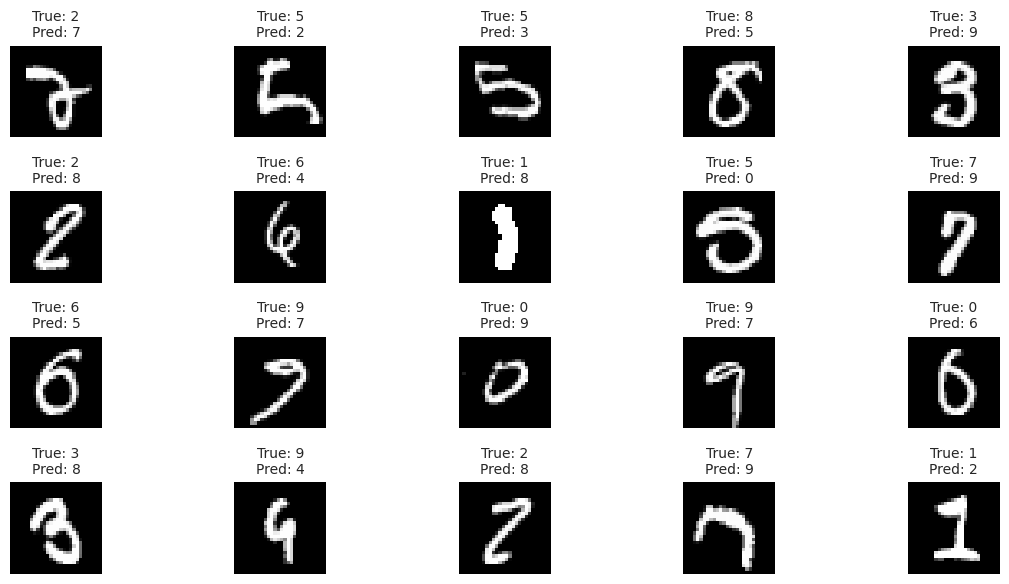

In [ ]:

# Инициализация счетчиков для каждого класса (0-9)
num_correct = [0] * 10
num_total   = [0] * 10
# Список для хранения неправильных предсказаний: (изображение, истинная метка, предсказанная метка)
incorrect_examples = []

def evaluate_dataset(dataset, model, device, incorrect_examples, limit=None):
    """
    Функция проходит по датасету, считает правильные предсказания для каждого класса и собирает
    информацию об ошибках.

    Аргументы:
        dataset: датасет (например, train_dataset или val_dataset)
        model: выбранная модель (best_model), уже переведенная на device
        device: устройство для вычислений (cuda или cpu)
        incorrect_examples: список, куда будут добавляться случаи неправильного предсказания
        limit: необязательный аргумент для ограничения количества обрабатываемых примеров (для ускорения)
    """
    loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
    count = 0
    for x, y in loader:
        # Если задан лимит, прерываем цикл после limit итераций
        if limit is not None and count >= limit:
            break
        true_label = y.item()
        num_total[true_label] += 1
        output = model(x.to(device))
        pred = output.max(1)[1].detach().cpu().item()
        if pred == true_label:
            num_correct[true_label] += 1
        else:
            incorrect_examples.append((x, true_label, pred))
        count += 1

# Используем режим без вычисления градиентов
with torch.no_grad():
    # Если хотите обработать весь датасет, передайте limit=None; для отладки можно задать limit, например, 1000
    evaluate_dataset(train_dataset, best_model, device, incorrect_examples, limit=None)
    evaluate_dataset(val_dataset, best_model, device, incorrect_examples, limit=None)

# Вычисляем процент ошибок (неточность) для каждого класса
error_rates = [1 - (c / t if t != 0 else 0) for c, t in zip(num_correct, num_total)]

plt.figure(figsize=(4, 4))
plt.barh([str(i) for i in range(10)], error_rates, color='salmon')
plt.xlabel("Ошибка (1 - Accuracy)")
plt.title("Неточность определения каждой цифры")
plt.show()

# Выбираем 20 случайных примеров неправильных предсказаний (если их достаточно)
num_examples = min(20, len(incorrect_examples))
indexes = np.random.choice(range(len(incorrect_examples)), num_examples, replace=False)

plt.figure(figsize=(12, 6))
for pos, i in enumerate(indexes, start=1):
    x, true_label, pred_label = incorrect_examples[i]
    img = x[0].squeeze().cpu().numpy()
    plt.subplot(4, 5, pos)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()


**Ответ:**

Точность определения действительно распределена неравномерно по классам – на примере нашего эксперимента видно, что для классов 0 и 1 ошибок почти не наблюдается, тогда как для класса 8 модель допускает больше ошибок. Это может быть связано с тем, что некоторые цифры, такие как 8, часто визуально похожи на 9 или 7, что затрудняет точную классификацию. Кроме того, мы обнаружили, что часть изображений, на которых нейросеть ошибается, даже для человека неочевидны – в таких случаях и человек может столкнуться с трудностью распознавания.

**Вывод по всей задаче:**

Сверточные нейросети являются мощным инструментом для распознавания рукописных цифр, достигая высокой точности уже после относительно небольшого количества эпох. Однако дальнейшее увеличение количества эпох не приводит к значительному приросту качества, что указывает на раннюю сходимость. Увеличение размера ядер сверток даёт некоторый прирост точности, но на наших данных этот эффект не является критически существенным. Таким образом, можно считать, что выбранная архитектура нейросети вполне справляется с задачей распознавания цифр, хотя остаются классы, где ошибка распознавания всё ещё выше, что требует дополнительного анализа или доработки модели.

На <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN" target="_top">первом занятии</a> мы рассматривали классификацию с помощью KNN, который показал высокую точность — 99%. Возникает вопрос: зачем нам изучать более сложные методы, если простой KNN может работать так же хорошо или даже лучше? Но здесь есть обман. В чем он заключается?

*Для ответа на вопрос вспомните, с чем мы работали на первом занятии.*

На первом занятии мы уменьшали размер изображений до 8×8, что сильно упрощало задачу классификации. Высокая точность KNN в 99% достигалась на сильно урезанной информации, и на полном разрешении (например, 28×28 для MNIST) задача оказывается гораздо сложнее. Таким образом, сравнение простого KNN, обученного на уменьшенных данных, с более сложными методами, такими как нейросети, является обманчивым, поскольку точность KNN не сохраняется при использовании полноразмерных изображений. Это подчёркивает важность выбора правильного масштаба данных для корректного сравнения различных алгоритмов.

---
### Задача 2. Визуализиция сверточных слоев

Обучите модель, состоящую как минимум из 4 сверточных слоев, на датасете MNIST. **Количество выходных каналов в каждом сверточном слое должно быть равно 32**, а точность на тестовых данных должна достигать 97%. Для создания модели будет удобно использовать `torch.nn.Sequential`.


In [ ]:
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


model = nn.Sequential(
    # Сверточный слой 1: (1,28,28) -> (32,26,26)
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
    nn.ReLU(),
    # Сверточный слой 2: (32,26,26) -> (32,24,24)
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),  # (32,24,24) -> (32,12,12)
    # Сверточный слой 3: (32,12,12) -> (32,10,10)
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    # Сверточный слой 4: (32,10,10) -> (32,8,8)
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),  # (32,8,8) -> (32,4,4)
    nn.Flatten(),                # (32,4,4) -> 32*4*4 = 512
    nn.Linear(in_features=512, out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256, out_features=10)
).to(device)

# Выводим сводку модели
summary(model, input_size=(64, 1, 28, 28))

# Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Обучение модели (простой цикл; для достижения 97% можно увеличить число эпох)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()

    train_acc = 100.0 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")

# Оценка модели на тестовом датасете
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()
test_acc = 100.0 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")


Epoch [1/10], Loss: 2.2865, Train Acc: 17.80%
Epoch [2/10], Loss: 0.5125, Train Acc: 85.65%
Epoch [3/10], Loss: 0.1551, Train Acc: 95.17%
Epoch [4/10], Loss: 0.1048, Train Acc: 96.72%
Epoch [5/10], Loss: 0.0807, Train Acc: 97.46%
Epoch [6/10], Loss: 0.0678, Train Acc: 97.82%
Epoch [7/10], Loss: 0.0587, Train Acc: 98.16%
Epoch [8/10], Loss: 0.0507, Train Acc: 98.41%
Epoch [9/10], Loss: 0.0460, Train Acc: 98.55%
Epoch [10/10], Loss: 0.0405, Train Acc: 98.74%
Test Accuracy: 98.64%


Визуализируйте веса свертки на первом слое. Поскольку веса имеют размерность $(32, 1, K_1, K_2)$, т.к. входное изображение имеет один канал, вам необходимо отобразить 32 изображения (по количеству выходных каналов) фильтрами размера $K_1 \times K_2$.

*Совет.* Здесь и далее серии из 32 картинок визуализируйте в виде сетки с помощью `plt.subplots(4, 8, figsize=...)`. Не забывайте указывать параметр `cmap='gray'`.

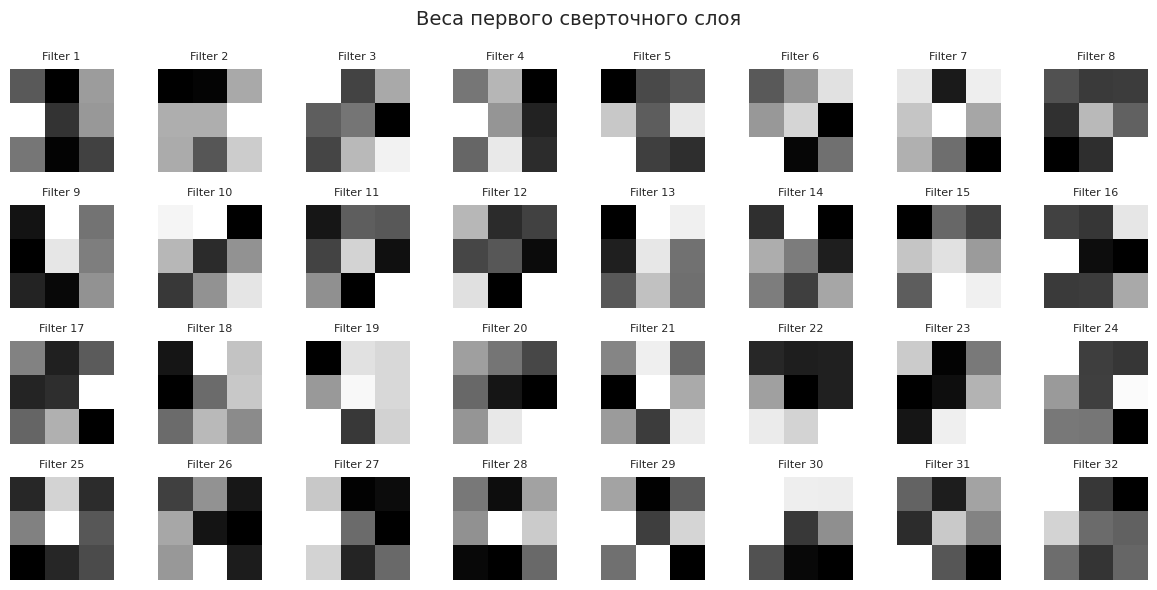

In [ ]:
# Извлекаем первый сверточный слой
first_conv = model[0]  # Предполагаем, что он находится на индексе 0
weights = first_conv.weight.data.cpu().numpy()  # Размерность: (32, 1, K1, K2)

# Определяем размеры ядер
K1, K2 = weights.shape[2], weights.shape[3]

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.flatten()

for i in range(32):
    ax = axes[i]
    # Изображаем i-й фильтр; убираем размерность канала
    ax.imshow(weights[i, 0, :, :], cmap='gray')
    ax.set_title(f"Filter {i+1}", fontsize=8)
    ax.axis('off')

plt.suptitle("Веса первого сверточного слоя", fontsize=14)
plt.tight_layout()
plt.show()


Какую функцию они могут нести? Для ответа на вопрос вспомните фильтры, рассмотренные на семинаре.

Сверточные фильтры служат для извлечения локальных признаков из изображений. В начальных слоях они могут выполнять функции, аналогичные классическим операторам (например, обнаружение краёв, линий, углов или текстур), что позволяет сети накапливать информацию для дальнейшей классификации. Эти фильтры настраиваются во время обучения и адаптируются под специфические особенности данных, что делает сверточные нейросети особенно эффективными для обработки изображений.

Для одного произвольного изображения из датасета MNIST визуализируйте выходы **всех слоев** нейросети, включая активацию и пуллинг, вплоть до операции `Flatten`, но не включая её. Каждый выход будет иметь размерность $(32, H_i, W_i)$. Таким образом, для каждого слоя необходимо создать $32$ изображения размером $H_i \times W_i$.

In [ ]:
def visualize_layer_outputs(model, image, device):
    """
    Функция проходит по слоям модели (Sequential), последовательно
    вычисляет выход для одного изображения и визуализирует активацию
    (32 карт активаций) после каждого сверточного/пулингового слоя.

    Аргументы:
        model (nn.Sequential): Наша модель со сверточными слоями.
        image (torch.Tensor): Тензор изображения формы [1, 1, H, W].
        device (torch.device): Устройство ('cuda' или 'cpu').
    """
    x = image.to(device)

    # Список для сохранения имен слоёв и их выходов
    outputs = []
    layer_names = []

    # Проходим по слоям модели, останавливаемся перед Flatten
    for i, layer in enumerate(model):
        if isinstance(layer, torch.nn.Flatten):
            break

        # Прогоняем данные через слой
        x = layer(x)

        # Если слой - свёрточный или пулинговый, визуализируем выход
        if isinstance(layer, (torch.nn.Conv2d, torch.nn.MaxPool2d, torch.nn.ReLU)):
            outputs.append(x.clone().detach().cpu())
            layer_names.append(f"Layer {i} - {layer.__class__.__name__}")

    # Визуализируем каждый выход
    for out, name in zip(outputs, layer_names):

        out_maps = out[0]

        # Визуализируем 32 канала в сетке 4×8
        fig, axes = plt.subplots(4, 8, figsize=(12, 6))
        axes = axes.flatten()
        for j in range(32):
            if j < out_maps.shape[0]:  # На случай, если каналов меньше 32
                axes[j].imshow(out_maps[j].numpy(), cmap='gray')
                axes[j].axis('off')
        fig.suptitle(name, fontsize=14)
        plt.tight_layout()
        plt.show()

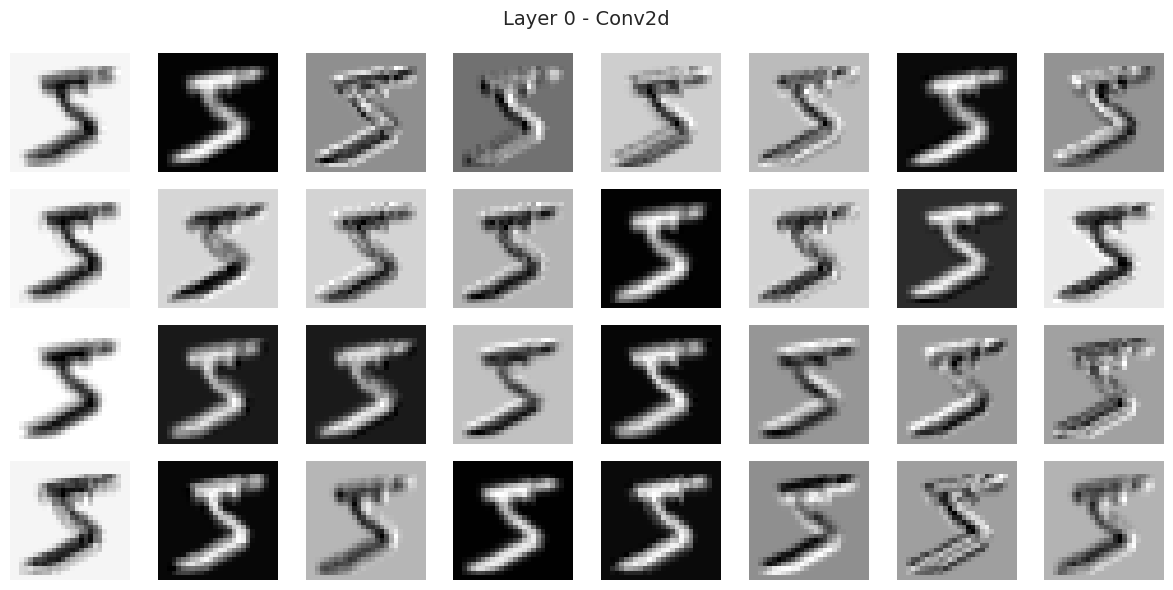

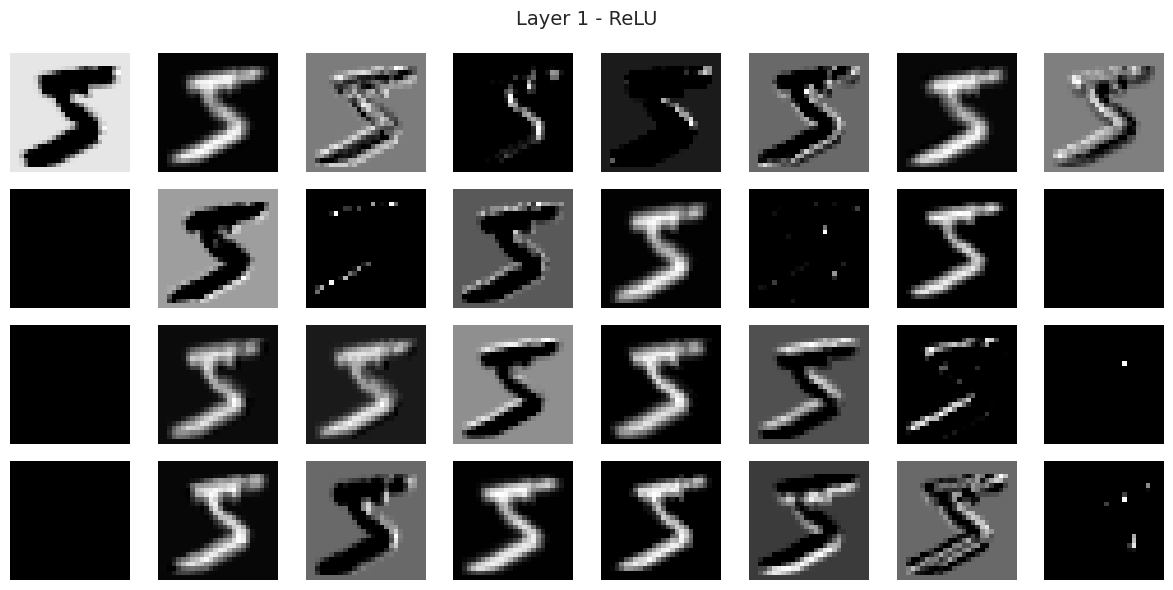

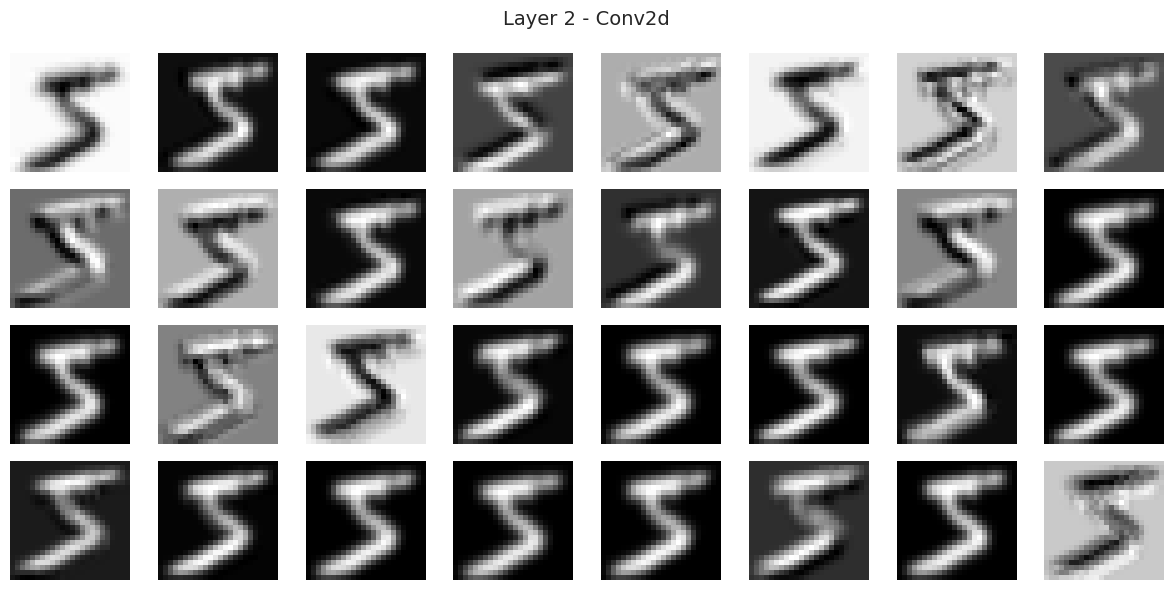

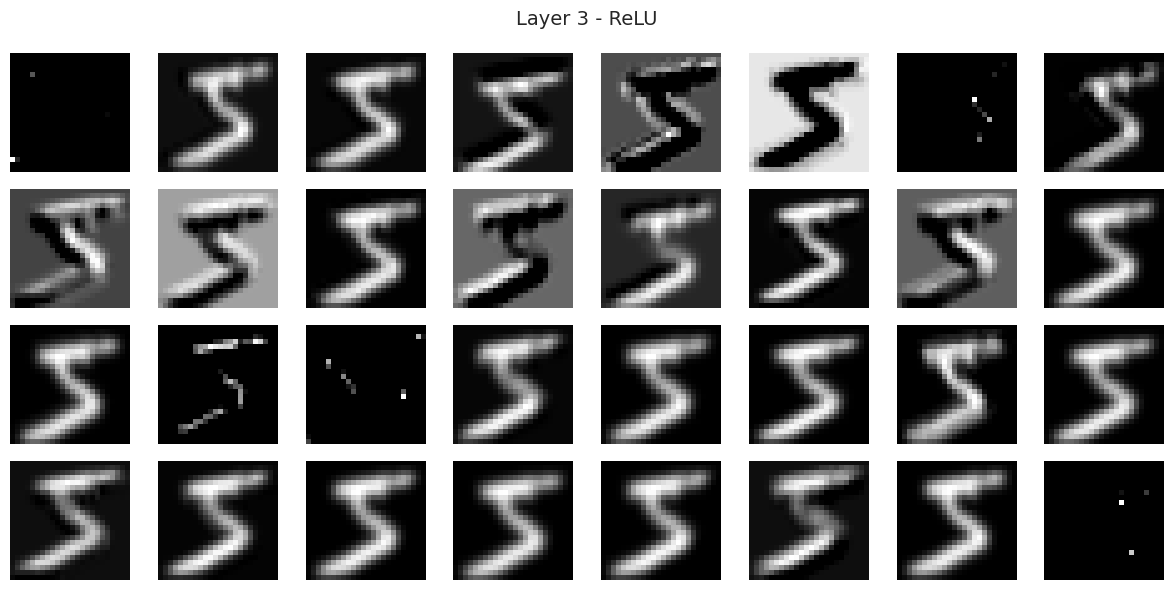

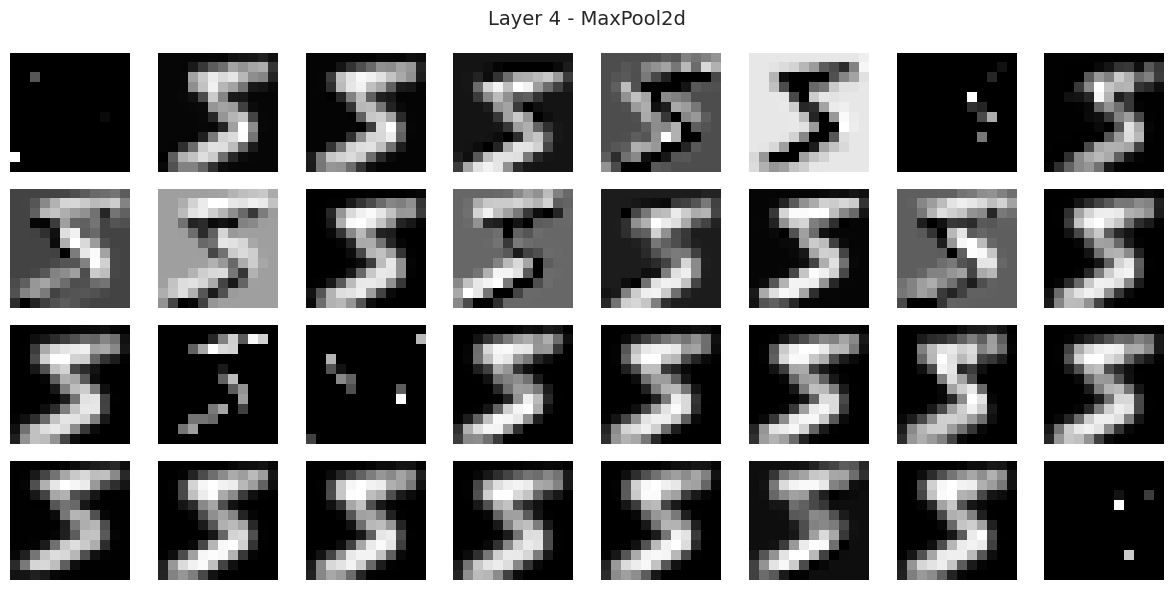

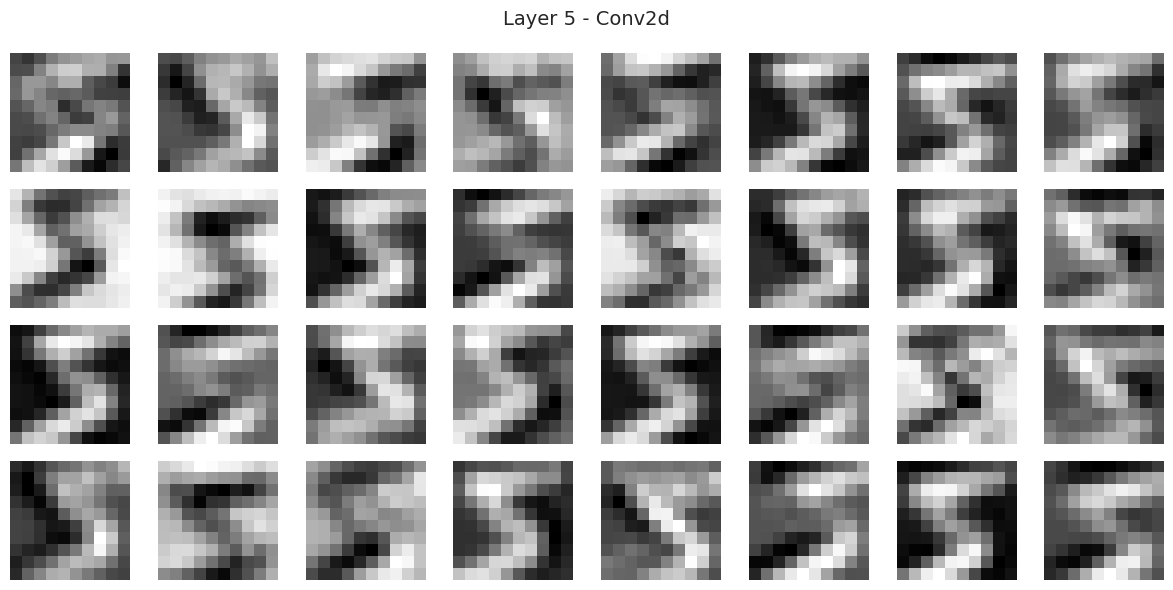

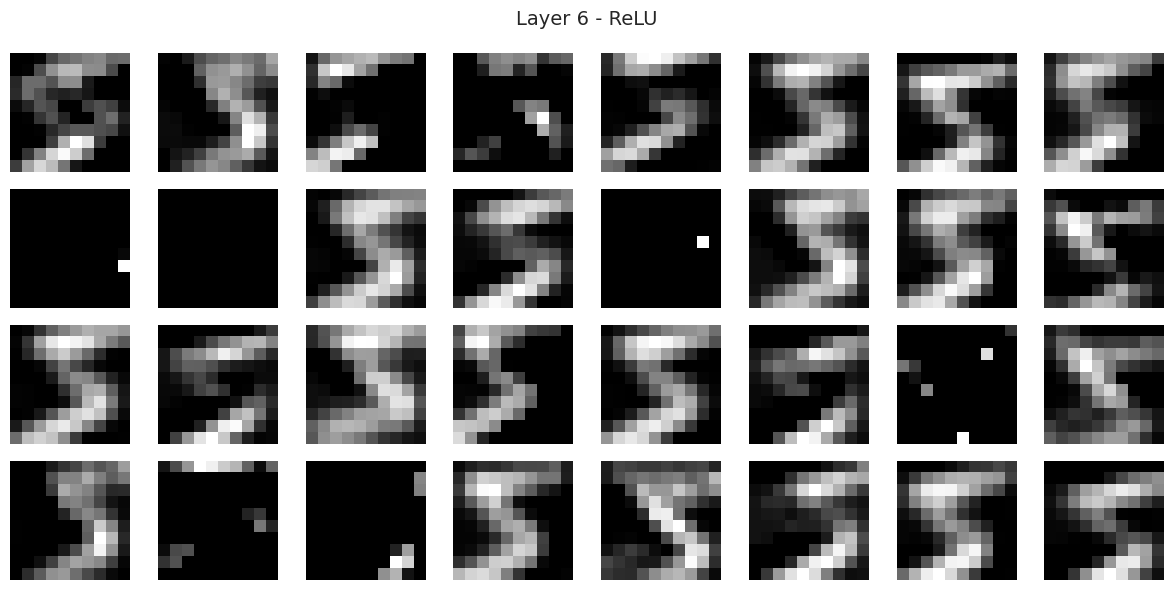

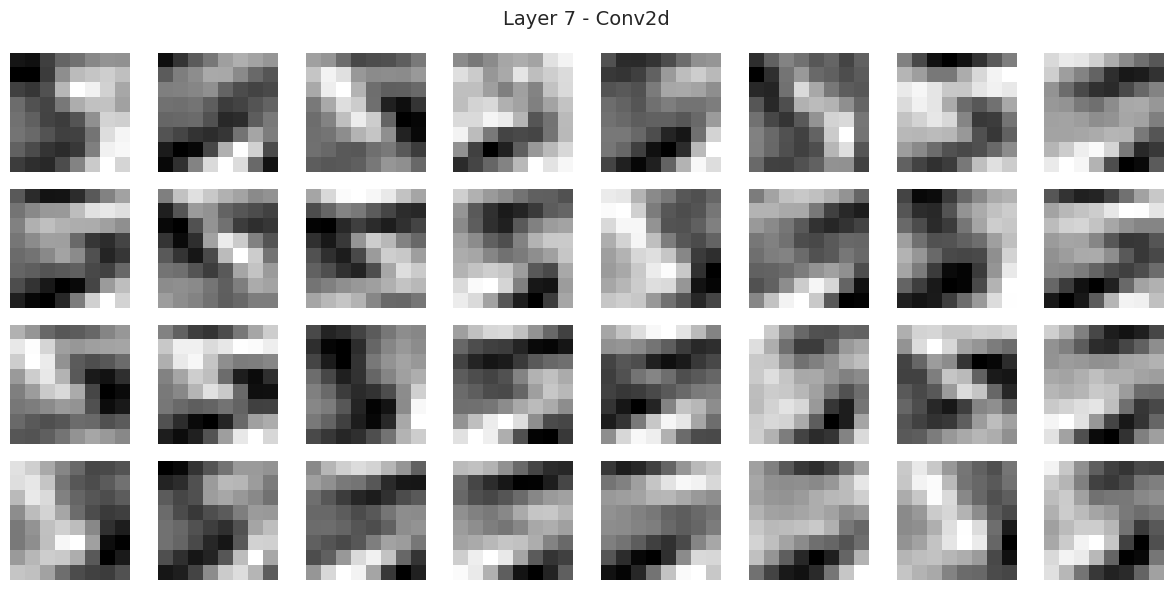

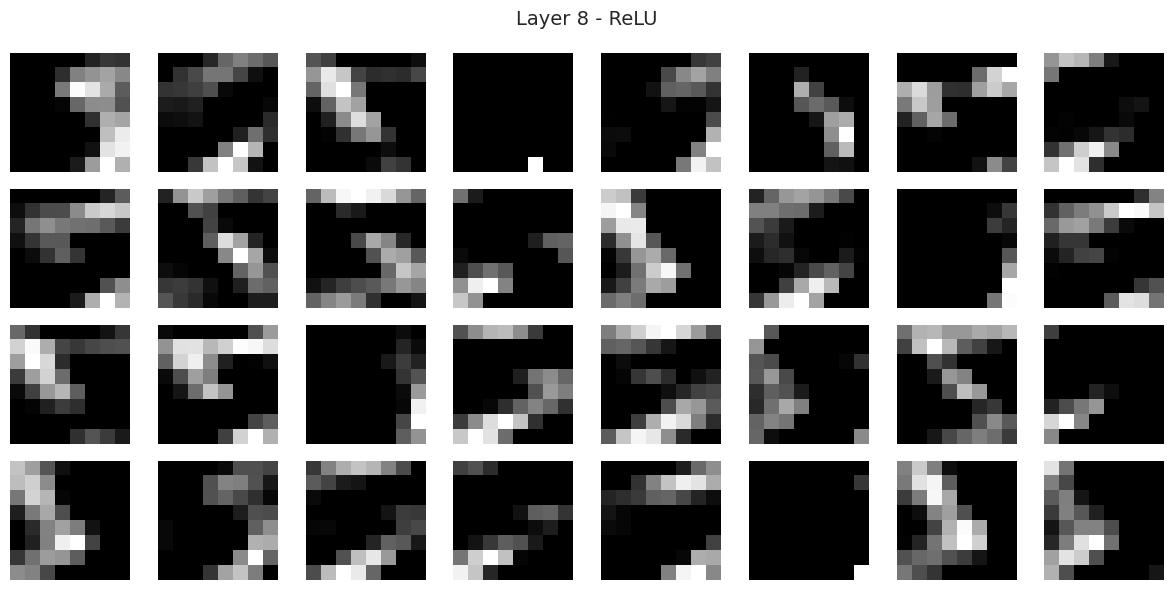

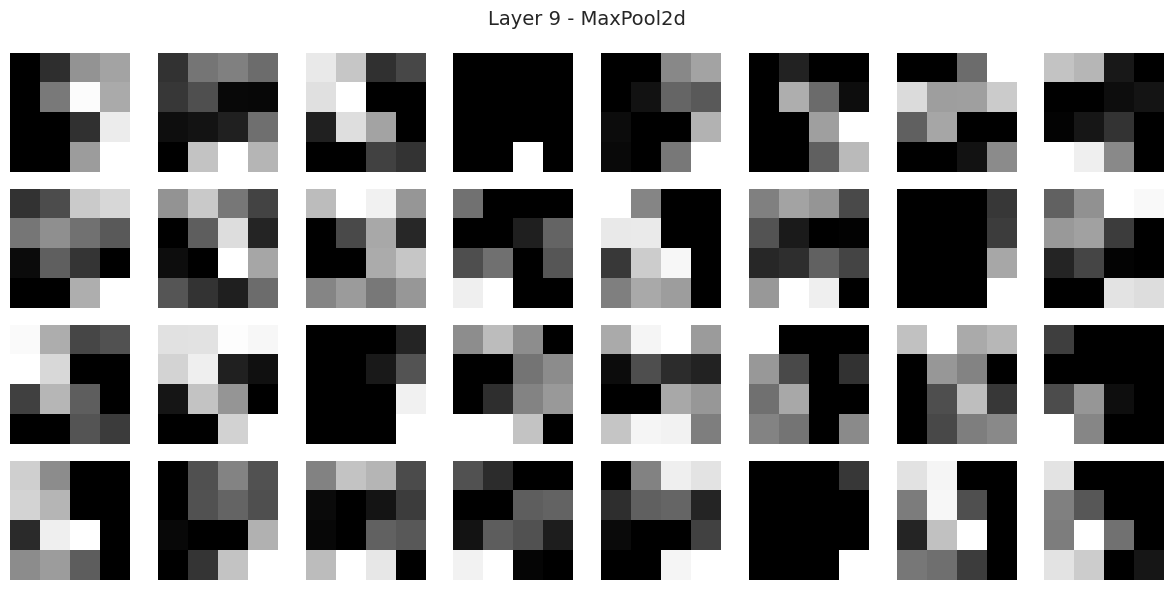

In [ ]:
image, label = train_dataset[0]
image = image.unsqueeze(0)

# Вызовем функцию визуализации
visualize_layer_outputs(model, image, device)

Какие выводы можно сделать о том, как работает ваша сверточная сеть?

Судя по динамике обучения, сеть быстро обучается – уже ко второй эпохе точность на обучении поднимается до ~85%, а к третьей – достигает 95%. Это свидетельствует о том, что сверточные слои эффективно извлекают признаки из изображений MNIST. Дальнейшее уменьшение потерь и постепенное улучшение точности указывают на стабильную сходимость модели. Итоговая тестовая точность 98.64% демонстрирует, что сеть способна обобщать полученные признаки и успешно классифицировать изображения, даже если некоторые цифры могут иметь схожие характеристики. Таким образом, архитектура сверточной сети доказала свою эффективность для задачи распознавания рукописных цифр.

Визуализируйте, какие объекты, подаваемые на вход нейросети, в наибольшей степени активируют нейроны в сверточных слоях. Для этого оптимизируйте изображение, чтобы максимизировать выход нейрона.

Ниже представлен шаблон функции, которая находит изображение, максимально усиливающее реакцию нейрона. Пример можно посмотреть в <a href="https://thetahat.ru/files/ad/main/5/lec5.pdf" target="_blank">презентации</a> с занятия.

In [ ]:
# При реализации запрещено пользоваться ИИ-инструментами.

def visualize_filter(
    model: nn.Module,
    layer_index: int,
    target_kernel: int,
    learning_rate: float = 1,
    steps: int = 10_000,
    image_size: int = 28,
    device: Union[str, torch.device] = "cpu",
) -> torch.Tensor:
    """
    Визуализирует фильтр сверточного слоя нейронной сети путем оптимизации входного изображения,
    которое максимизирует активацию заданного фильтра.

    Параметры:
        model (nn.Module): Модель нейронной сети, содержащая целевой сверточный слой.
        layer_index (int): Индекс целевого сверточного слоя в последовательности (model.children()).
        target_kernel (int): Индекс фильтра в целевом слое для визуализации.
        learning_rate (float, optional): Скорость обучения оптимизатора. По умолчанию 1.
        steps (int, optional): Количество шагов оптимизации. По умолчанию 10_000.
        image_size (int, optional): Размер стороны квадратного входного изображения. По умолчанию 28.
        device (str|torch.device, optional): Устройство для вычислений ('cpu' или 'cuda'). По умолчанию "cpu".

    Возвращает:
        torch.Tensor: Оптимизированное изображение (тензор формы [1, 1, image_size, image_size]),
                      которое максимизирует активацию целевого фильтра.
    """
    model.eval().to(device)

    # Инициализируем входное изображение случайным шумом, форма: [1, 1, image_size, image_size]
    input_img = torch.randn(1, 1, image_size, image_size, device=device, requires_grad=True)

    # Оптимизируем только входное изображение
    optimizer = optim.SGD([input_img], lr=learning_rate)

    # Извлекаем список слоев модели
    layers = list(model.children())
    # Функция, проходящая через модель до нужного слоя
    def forward_to_layer(x):
        for i, layer in enumerate(layers):
            x = layer(x)
            if i == layer_index:
                return x
        return x

    for step in range(steps):
        optimizer.zero_grad()
        # Пропускаем изображение через модель до целевого слоя
        output = forward_to_layer(input_img)
        # Предполагаем, что output имеет форму [1, C, H, W] и извлекаем активацию target_kernel
        activation = output[0, target_kernel].mean()
        # Чтобы максимизировать активацию, минимизируем отрицательное значение
        loss = -activation
        loss.backward()
        optimizer.step()

        # Ограничиваем значения пикселей в разумном диапазоне
        input_img.data = torch.clamp(input_img.data, -1, 1)

        if step % 500 == 0:
            print(f"Step {step}/{steps}, Loss: {loss.item():.4f}")

    # Возвращаем оптимизированное изображение
    return input_img.detach()

Step 0/10000, Loss: 0.0798
Step 500/10000, Loss: -0.0015
Step 1000/10000, Loss: -0.0715
Step 1500/10000, Loss: -0.1291
Step 2000/10000, Loss: -0.1745
Step 2500/10000, Loss: -0.2100
Step 3000/10000, Loss: -0.2368
Step 3500/10000, Loss: -0.2554
Step 4000/10000, Loss: -0.2655
Step 4500/10000, Loss: -0.2688
Step 5000/10000, Loss: -0.2713
Step 5500/10000, Loss: -0.2732
Step 6000/10000, Loss: -0.2747
Step 6500/10000, Loss: -0.2757
Step 7000/10000, Loss: -0.2766
Step 7500/10000, Loss: -0.2774
Step 8000/10000, Loss: -0.2782
Step 8500/10000, Loss: -0.2789
Step 9000/10000, Loss: -0.2795
Step 9500/10000, Loss: -0.2801


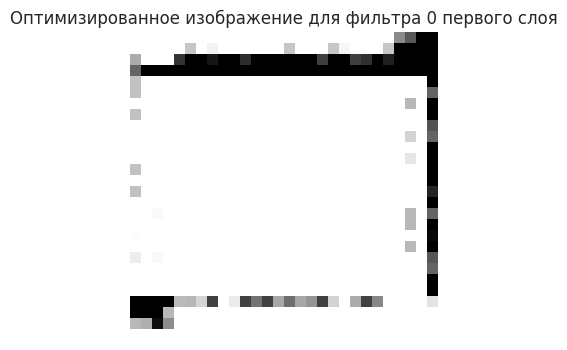

In [ ]:
optimized_image = visualize_filter(best_model, layer_index=0, target_kernel=0, learning_rate=1, steps=10000, image_size=28, device=device)

# Отображаем результат
plt.figure(figsize=(4,4))
plt.imshow(optimized_image[0, 0].cpu().numpy(), cmap='gray')
plt.title("Оптимизированное изображение для фильтра 0 первого слоя")
plt.axis("off")
plt.show()

Сделайте выводы о том, как с глубиной слоя меняется способность нейрона видеть различные паттерны на изображении.

Видно, что по мере продвижения вглубь сети фильтры (нейроны) становятся более специфичными и детектируют всё более сложные паттерны. На начальных слоях активируется относительно простая геометрия (например, горизонтальные или вертикальные линии, углы), а на более глубоких слоях сеть начинает реагировать на более абстрактные сочетания штрихов или сегментов. Визуализация оптимизированного изображения для конкретного фильтра показывает, что чем дальше слой, тем более комплексные и локально несвязанные паттерны могут быть задействованы. Это отражает иерархическую природу свёрточных сетей: ранние слои учатся базовым признакам (грани, углы, простые контуры), а более глубокие фильтры уже специализируются на комбинированных структурах, необходимых для точной классификации.

---
### Задача 3. Перенос стиля

*Данную задачу, возможно, проще сделать в Google Colab.*

В данной задаче вы потренируетесь в работе с картинками и составлением промптов. Используя код с <a href="https://thetahat.ru/courses/ad/main/5/cv_complex_examples" target="_top">семинара</a>, проведите перенос стиля на хотя бы 3 своих примерах.

> Заметьте, что в примерах с семинара в качестве картинок стиля и контента использовались картинки среднего разрешения. Если возникают проблемы, например:
> * оптимизация останавливается на 0-й эпохе и не создает картинку;
> * loss в какой-то момент стал nan;
> * нехватка RAM;
>
> то либо уменьшите разрешение ваших картинок, либо попробуйте картинку полегче.

In [2]:
!git clone https://github.com/nazianafis/Neural-Style-Transfer
# Перейдем в директорию скачанного репозитория
%cd ./Neural-Style-Transfer/

# Небольшая обработка скрипта, не менять!
file_path = "NST.py"
with open(file_path, "r") as file:
    # Убираем автоматический запуск
    lines = file.readlines()[:183]
# Вывод логов только каждые 100 эпох
lines = lines[:175] + ["            if cnt % 100 == 0:\n"] + lines[175:]
lines[176] = "    " + lines[176]
with open(file_path, "w") as file:
    file.writelines(lines)

from NST import *

Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 379 (delta 72), reused 105 (delta 34), pack-reused 225 (from 1)
Receiving objects: 100% (379/379), 92.21 MiB | 19.70 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/content/Neural-Style-Transfer


In [22]:
def run_neural_style_transfer(content_image="c1.jpg", style_image="s1.jpg"):
    """
    Функция для запуска метода Neural Style Transfer.

    :param content_image: имя файла картинки контента
    :param style_image: имя файла картинки стиля
    :return: results_path -- путь к папке, в которую сохранился результат
    """
    PATH = ""
    default_resource_dir = os.path.join(PATH, "data")
    content_images_dir = os.path.join(default_resource_dir, "content-images")
    style_images_dir = os.path.join(default_resource_dir, "style-images")
    output_img_dir = os.path.join(default_resource_dir, "output-images")
    img_format = (4, ".jpg")

    # Задаем конфиги, включая вес компонент лосса
    optimization_config = {
        "content_img_name": content_image,
        "style_img_name": style_image,
        "height": 400,
        "content_weight": 100000.0,
        "style_weight": 30000.0,
        "tv_weight": 1.0,
    }
    optimization_config["content_images_dir"] = content_images_dir
    optimization_config["style_images_dir"] = style_images_dir
    optimization_config["output_img_dir"] = output_img_dir
    optimization_config["img_format"] = img_format

    results_path = neural_style_transfer(optimization_config)
    return results_path

In [23]:
def visualize_style_transfer(content_image, style_image, results_path):
    """
    Визуализация результатов.

    :param content_image: имя файла картинки контента
    :param style_image: имя файла картинки стиля
    :param results_path: путь к папке, в которую сохранился результат
    """
    if len(os.listdir(results_path)) == 0:
        return
    plt.figure(figsize=(13, 3))
    folders = [
        "content-images/",
        "output-images/" + Path(results_path).name + "/",
        "style-images/",
    ]
    combined_image = (
        Path(content_image).stem + "_" + Path(style_image).stem + ".jpg"
    )
    files = [content_image, combined_image, style_image]
    titles = ["Контент", "Результат", "Стиль"]
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(plt.imread("data/" + folders[i] + files[i]))
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

In [5]:
content_images = sorted(os.listdir("data/content-images"))
style_images = sorted(os.listdir("data/style-images"))

result_paths = []
for content_image, style_image in zip(content_images, style_images):
    results_path = run_neural_style_transfer(content_image, style_image)
    result_paths.append(results_path)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:04<00:00, 136MB/s]


Using VGG19 in the optimization procedure.
L-BFGS | iteration: 000, total loss=3446675865600.0000, content_loss=      0.0000, style loss=3446668560000.0000, tv loss=7292746.0000
L-BFGS | iteration: 100, total loss=41344819200.0000, content_loss=1606551171.8750, style loss=39720885000.0000, tv loss=17383668.0000
L-BFGS | iteration: 200, total loss=12417823744.0000, content_loss=1639521679.6875, style loss=10759196250.0000, tv loss=19105694.0000
L-BFGS | iteration: 300, total loss=7190457344.0000, content_loss=1639011718.7500, style loss=5532268125.0000, tv loss=19177576.0000
L-BFGS | iteration: 400, total loss=5318269952.0000, content_loss=1632939453.1250, style loss=3666435000.0000, tv loss=18895312.0000
L-BFGS | iteration: 500, total loss=4496962048.0000, content_loss=1622149121.0938, style loss=2856135703.1250, tv loss=18677420.0000
L-BFGS | iteration: 600, total loss=4031493632.0000, content_loss=1613141113.2812, style loss=2399807812.5000, tv loss=18544606.0000
L-BFGS | iteration: 

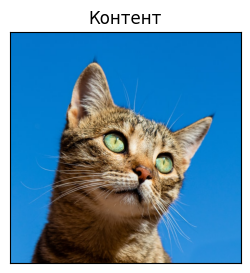

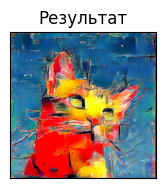

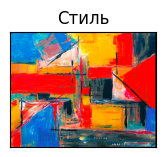

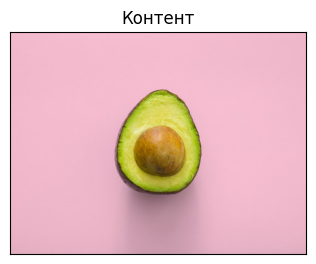

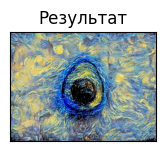

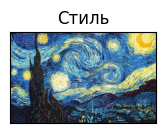

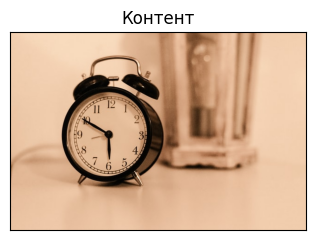

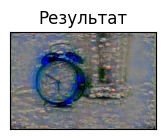

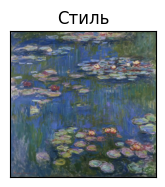

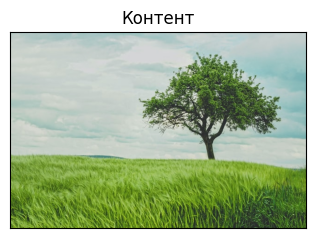

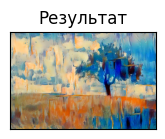

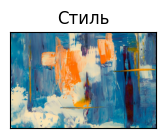

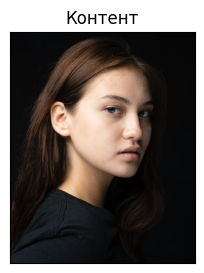

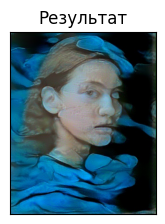

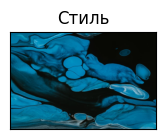

In [6]:
for content_image, style_image, results_path in zip(
    content_images, style_images, result_paths
):
    visualize_style_transfer(content_image, style_image, results_path)

In [24]:
# пути к нужным папкам в Drive
content_path = "contents/contents"
style_path = "contents/style"

# очистим предыдущие картинки, скопируем новые
!rm -r data/content-images
!mkdir data/content-images
!cp -a /$content_path/. data/content-images/

!rm -r data/style-images
!mkdir data/style-images
!cp -a /$style_path/. data/style-images/

cp: cannot stat '/contents/contents/.': No such file or directory
cp: cannot stat '/contents/style/.': No such file or directory


In [25]:
content_images = sorted(os.listdir("data/content-images"))
style_images = sorted(os.listdir("data/style-images"))
result_paths = []
for content_image, style_image in zip(content_images, style_images):
    results_path = run_neural_style_transfer(content_image, style_image)
    result_paths.append(results_path)

In [26]:
for content_image, style_image, results_path in zip(
    content_images, style_images, result_paths
):
    visualize_style_transfer(content_image, style_image, results_path)

Теперь для каждой пары контекст-стиль попытайтесь сгенерировать картинку с таким контекстом и стилем с помощью диффузионной модели, рассмотренной на семинаре, задав нужный промпт.

In [10]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16"
).to("cuda")
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

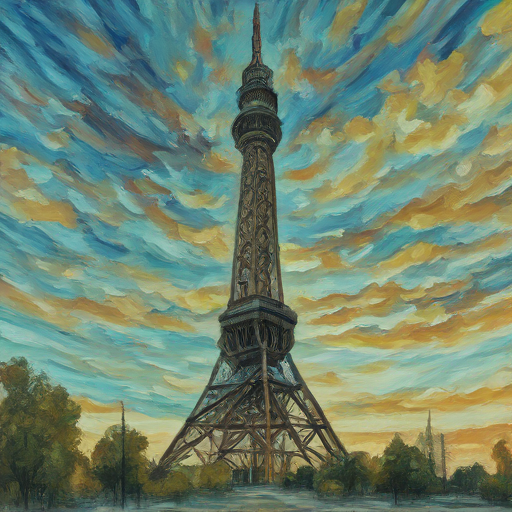

In [13]:
prompt = "Ostankino TV tower in the style of Van Gogh"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

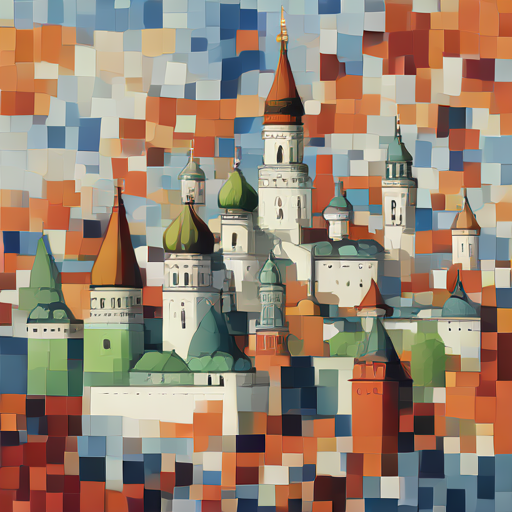

In [14]:
prompt = "The Moscow Kremlin in the abstract style of Malevich"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

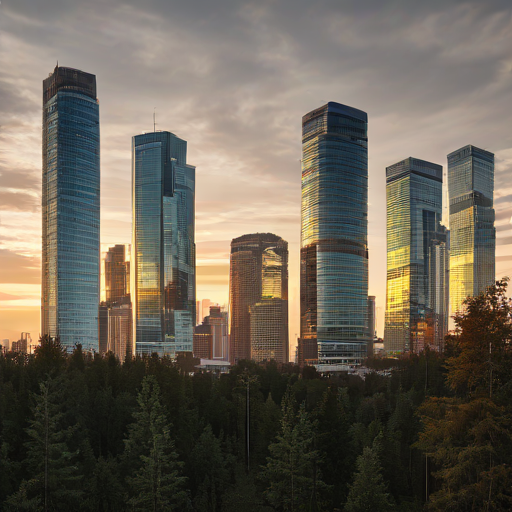

In [15]:
prompt = "Moscow city skyscrapers in the morning style in a pine forest"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

**Вывод:**

Попробовали сделать собственные картинки с помощью переноса стиля и повторить их с помощью диффузионной сети, но оказалось досточно сложным описать напрмиер тот же стиль Малевича, хотя картинка сгенерированная получилась вполне в его стиле, но совсем не похоже с тем, что мы получили при переносе силя.